<a href="https://colab.research.google.com/github/SaifurShatil/Macine-Learning/blob/main/mnist_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets

In [2]:
mnist=datasets.mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_labels.shape

(10000,)

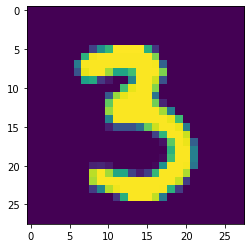

In [8]:
plt.imshow(train_images[298])

In [9]:
train_images=train_images/255.0
test_images=test_images/255.0

In [28]:
train_images[0].shape

(28, 28)

In [34]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

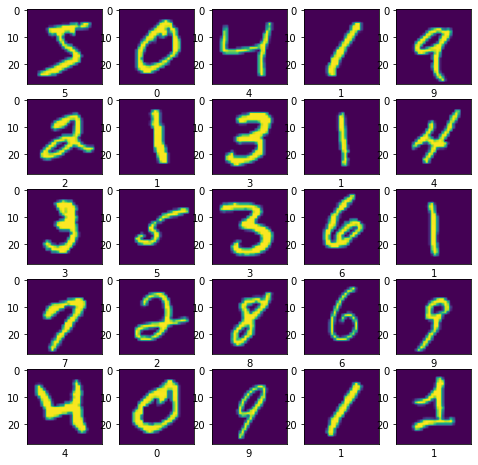

In [12]:
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i])
plt.show()


In [17]:
from keras import Sequential
from keras.layers import Flatten,Dense

In [29]:
model=Sequential([
                  Flatten(input_shape=(28,28)),
                  Dense(128,activation='relu'),
                  Dense(10)
])

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 9s 2ms/step - loss: 0.4376 - accuracy: 0.8795
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1249 - accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0786 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0576 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0429 - accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0327 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0267 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0207 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0166 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0127 - accurac

In [37]:
model.evaluate(test_images,test_labels)

 33/313 [==>...........................] - ETA: 0s - loss: 0.0731 - accuracy: 0.9735  

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 [==============================] - 1s 1ms/step - loss: 0.0826 - accuracy: 0.9780


[0.08264269679784775, 0.9779999852180481]

In [38]:
# to make predictions we have to convert logits to probabilities by adding sofftmax layer 

In [39]:
probability_model= Sequential([model,tf.keras.layers.Softmax()])

In [40]:
predictions=probability_model.predict(test_images)

In [41]:
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.23196931, 0.08533674, 0.08533674],
      dtype=float32)

In [43]:
np.argmax(predictions[0])

7

In [44]:
test_labels[0]

7

In [58]:
model2=Sequential([
                  Flatten(input_shape=(28,28)),
                  Dense(128,activation='relu'),
                  Dense(10,activation='softmax')
])

In [59]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [60]:
model2.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4287 - accuracy: 0.8792
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1193 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0759 - accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0430 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0322 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0262 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0225 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0164 - accuracy: 0.9951
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

In [61]:
model2.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0740 - accuracy: 0.9790


[0.07403276860713959, 0.9789999723434448]

In [62]:
predictions=model2.predict(test_images)

In [65]:
np.argmax(predictions[0])

7

In [66]:
test_labels[0]

7

In [69]:
np.argmax(predictions[1])

2

In [70]:
test_labels[1]

2

In [71]:
np.argmax(predictions[3])

0

In [72]:
test_labels[3]

0

In [73]:
test_labels[120]

5

In [85]:
np.argmax(predictions[120])

5